In [2]:
from sklearn import datasets,cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
n_samples = 1500

In [4]:
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=0.5,noise=0.05)       # iç içe geçmiş daireler
noisy_moons = datasets.make_moons(n_samples=n_samples,noise=0.05)     # yarım ay(hilal)
blobs = datasets.make_blobs(n_samples=n_samples)            # nokta bulutu

no_structure = np.random.rand(n_samples,20), None               # 20 boyurlu tamamen random üretilmiş veri


In [5]:
clustering_names = ["MiniBatchKMeans","SpectralClustering","Ward","AgglomerativeClustering","DBSCAN","Birch"]
# clustering isimlerini bir liste içine atayalım

In [6]:
color = np.array(["b","g","r","c","m","y"])
# küme renkleri

In [7]:
datasets = [noisy_circles,noisy_moons,blobs,no_structure]
# kullanılacak tüm veri setlerini bir listeye atalım

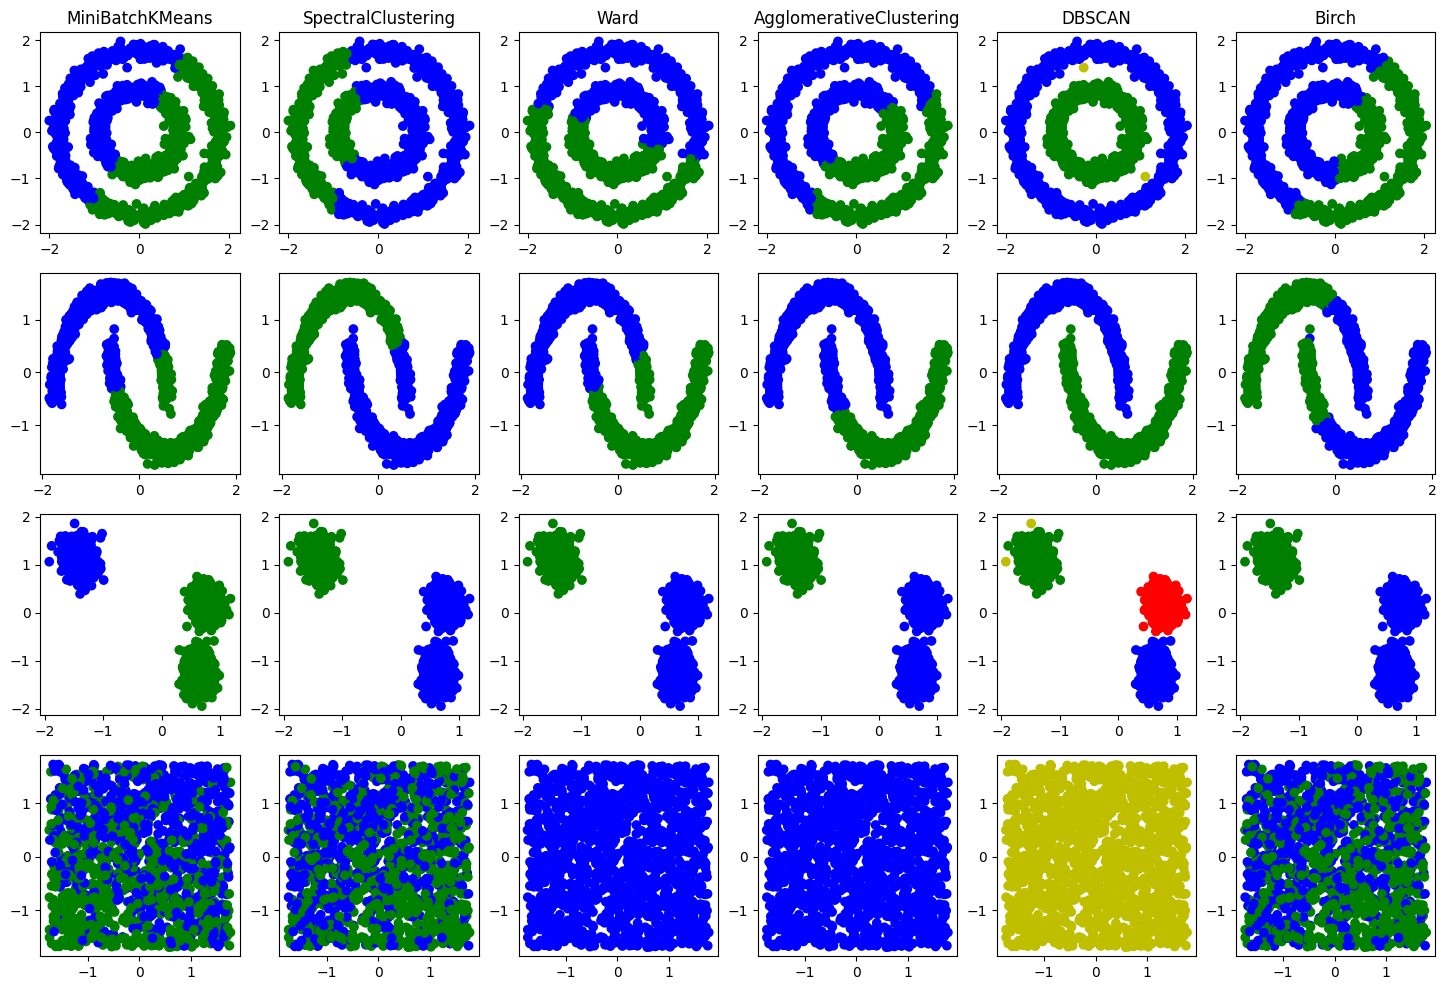

In [8]:
plt.figure(figsize=(18,12))
i = 1 # subplot indexi
for i_dataset,dataset in enumerate(datasets):
    X,y = dataset
    X = StandardScaler().fit_transform(X)

    two_means = cluster.MiniBatchKMeans(n_clusters=2)
     # MiniBatchKMeans (mini partili K-Ortalamalar), 2 küme
    
    ward = cluster.AgglomerativeClustering(n_clusters = 2,linkage="ward")
    # Hiyerarşik Ward kümeleme, 2 küme
    
    spectral = cluster.SpectralClustering(n_clusters=2)
    # Spektral kümeleme, 2 küme

    dbscan = cluster.DBSCAN(eps=0.2)
    # Yoğunluk tabanlı kümeleme (DBSCAN), eps=0.2

    average_linkage = cluster.AgglomerativeClustering(n_clusters=2,linkage="average")
    # Hiyerarşik kümeleme, ortalama bağlama

    birch = cluster.Birch(n_clusters=2)
    # BIRCH kümeleme, 2 küme

    clustering_algorithms = [two_means,ward,spectral,average_linkage,dbscan,birch]
    # Kullanılacak algoritmaların listesi (average_linkage iki kere var)

    for name,algo in zip(clustering_names,clustering_algorithms):
        algo.fit(X)
        if hasattr(algo,"labels_"):  # Algoritmanın etiketleri "labels_" olarak mı var kontrol et
            y_pred = algo.labels_.astype(int)  # Eğer varsa, tahmin edilen etiketleri al
        else:
            y_pred = algo.predict(X)  # Eğer varsa, tahmin edilen etiketleri al

        plt.subplot(len(datasets),len(clustering_algorithms),i)

        if i_dataset == 0:
            plt.title(name)
        plt.scatter(X[:,0],X[:,1],color = color[y_pred].tolist())

        i += 1
